# National Anthem Melody Creation and Sound Processing Project

## 1. Introduction

In this project, we will create an original melody using the text of the National Anthem, process and visualize this melody. The project combines text processing, music theory, sound generation and data visualization techniques.

## Loading and Importing the Required Libraries

First, let's load and import the libraries required for our project.

In [1]:
!pip install midiutil numpy matplotlib librosa pretty_midi

import random
import numpy as np
import matplotlib.pyplot as plt
from midiutil import MIDIFile
import librosa
import librosa.display
import pretty_midi


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


## National Anthem Text and Letter-Note Matching

Now, let's define the first two stanzas of the National Anthem and assign a MIDI note to each letter.

In [2]:
istiklal_marsi = '''
Korkma, sönmez bu şafaklarda yüzen al sancak;
Sönmeden yurdumun üstünde tüten en son ocak.
O benim milletimin yıldızıdır, parlayacak;
O benimdir, o benim milletimindir ancak.

Çatma, kurban olayım çehreni ey nazlı hilâl!
Kahraman ırkıma bir gül… ne bu şiddet bu celâl?
Sana olmaz dökülen kanlarımız sonra helâl,
Hakkıdır, Hakk’a tapan, milletimin istiklâl.
'''

harfler = 'abcçdefgğhıijklmnoöprsştuüvyz'
notalar = list(range(60, 89))  # C4 (60) ile F6 (88) arasındaki notalar
harf_nota_dict = {harf: random.choice(notalar) for harf in harfler}

print("Harf-Nota Eşleştirmesi:")
for harf, nota in harf_nota_dict.items():
    print(f"{harf}: {nota}")

Harf-Nota Eşleştirmesi:
a: 66
b: 76
c: 70
ç: 61
d: 86
e: 73
f: 63
g: 83
ğ: 75
h: 78
ı: 62
i: 66
j: 67
k: 63
l: 73
m: 84
n: 65
o: 79
ö: 61
p: 75
r: 62
s: 82
ş: 75
t: 68
u: 85
ü: 83
v: 78
y: 75
z: 71


## 4. Transcribing the Text into Notation

Now, let's write a function to convert our text to notation and use this function to create our normal and inverse melodies.

In [3]:
def metni_notaya_cevir(metin):
    return [harf_nota_dict.get(harf.lower(), -1) for harf in metin if harf.isalpha()]

normal_melodi = metni_notaya_cevir(istiklal_marsi)
ters_melodi = metni_notaya_cevir(istiklal_marsi[::-1])

print("Normal Melodinin İlk 10 Notası:", normal_melodi[:10])
print("Ters Melodinin İlk 10 Notası:", ters_melodi[:10])

Normal Melodinin İlk 10 Notası: [63, 79, 62, 63, 84, 66, 82, 61, 65, 84]
Ters Melodinin İlk 10 Notası: [73, -1, 73, 63, 66, 68, 82, 66, 65, 66]


## 5. Creating a MIDI File

Let's create a MIDI file using the melodies we created.

In [4]:
midi = MIDIFile(1)
track = 0
time = 0
midi.addTrackName(track, time, "Istiklal Marsi Melodisi")
midi.addTempo(track, time, 120)

# Normal melodiyi ekleyelim
for i, nota in enumerate(normal_melodi):
    if nota != -1:
        duration = 0.5 if i % 2 == 0 else 0.25
        midi.addNote(track, 0, nota, time, duration, 100)
        time += duration

# Ters melodiyi ekleyelim
for i, nota in enumerate(ters_melodi):
    if nota != -1:
        duration = 0.25 if i % 2 == 0 else 0.5
        midi.addNote(track, 0, nota, time, duration, 80)
        time += duration

with open("istiklal_marsi_melodi.mid", "wb") as output_file:
    midi.writeFile(output_file)

print("MIDI dosyası 'istiklal_marsi_melodi.mid' adıyla kaydedildi.")

MIDI dosyası 'istiklal_marsi_melodi.mid' adıyla kaydedildi.


## 6. Converting MIDI to Audio Data

Let's convert the MIDI file we created to audio data.

In [5]:
midi_data = pretty_midi.PrettyMIDI("istiklal_marsi_melodi.mid")
audio_data = midi_data.synthesize()

print("Ses verisinin uzunluğu:", len(audio_data))
print("Ses verisinin örnek değerleri:", audio_data[:10])

Ses verisinin uzunluğu: 4729725
Ses verisinin örnek değerleri: [0.         0.04432436 0.08855963 0.1326189  0.17641564 0.2198638
 0.26287804 0.30537388 0.34726784 0.38847767]


## BONUS: 7. Visualization of Melodies

Now, let's visualize the normal and inverse melodies we created.

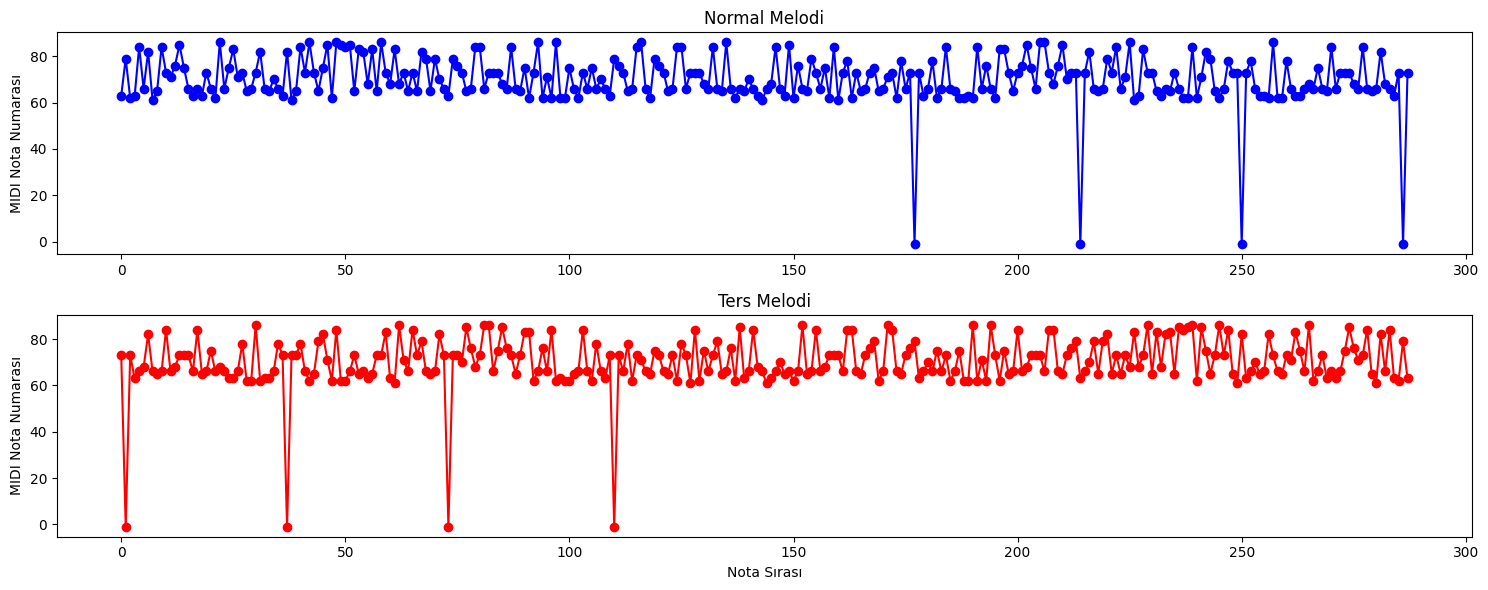

Melodi görselleştirmesi 'istiklal_marsi_melodileri.png' adıyla kaydedildi.


In [6]:
plt.figure(figsize=(15, 6))
plt.subplot(2, 1, 1)
plt.title("Normal Melodi")
plt.plot(normal_melodi, 'b-o')
plt.ylabel("MIDI Nota Numarası")

plt.subplot(2, 1, 2)
plt.title("Ters Melodi")
plt.plot(ters_melodi, 'r-o')
plt.ylabel("MIDI Nota Numarası")
plt.xlabel("Nota Sırası")

plt.tight_layout()
plt.savefig("istiklal_marsi_melodileri.png")
plt.show()
print("Melodi görselleştirmesi 'istiklal_marsi_melodileri.png' adıyla kaydedildi.")

## BONUS: Audio Processing and Updating with Librosa 8.

Let's process and update our audio data with the Librosa library.

In [7]:
sr = 44100  # Örnek hızı
y = audio_data

# Tempo algılama ve ritim güncelleme
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
y_harmonic, y_percussive = librosa.effects.hpss(y)
y_rhythmic = y_percussive + 0.5 * y_harmonic

# Pitch shifting uygulama
y_pitched = librosa.effects.pitch_shift(y_rhythmic, sr=sr, n_steps=2)

# Reverb efekti ekleme
y_reverb = np.convolve(y_pitched, np.exp(-np.linspace(0, 2, 1000)), mode='same')

print("Orijinal ses verisinin uzunluğu:", len(y))
print("İşlenmiş ses verisinin uzunluğu:", len(y_reverb))

Orijinal ses verisinin uzunluğu: 4729725
İşlenmiş ses verisinin uzunluğu: 4729725


## BONUS: 9. Visualization of the Updated Audio File

Finally, let's visualize our updated audio file in various ways.

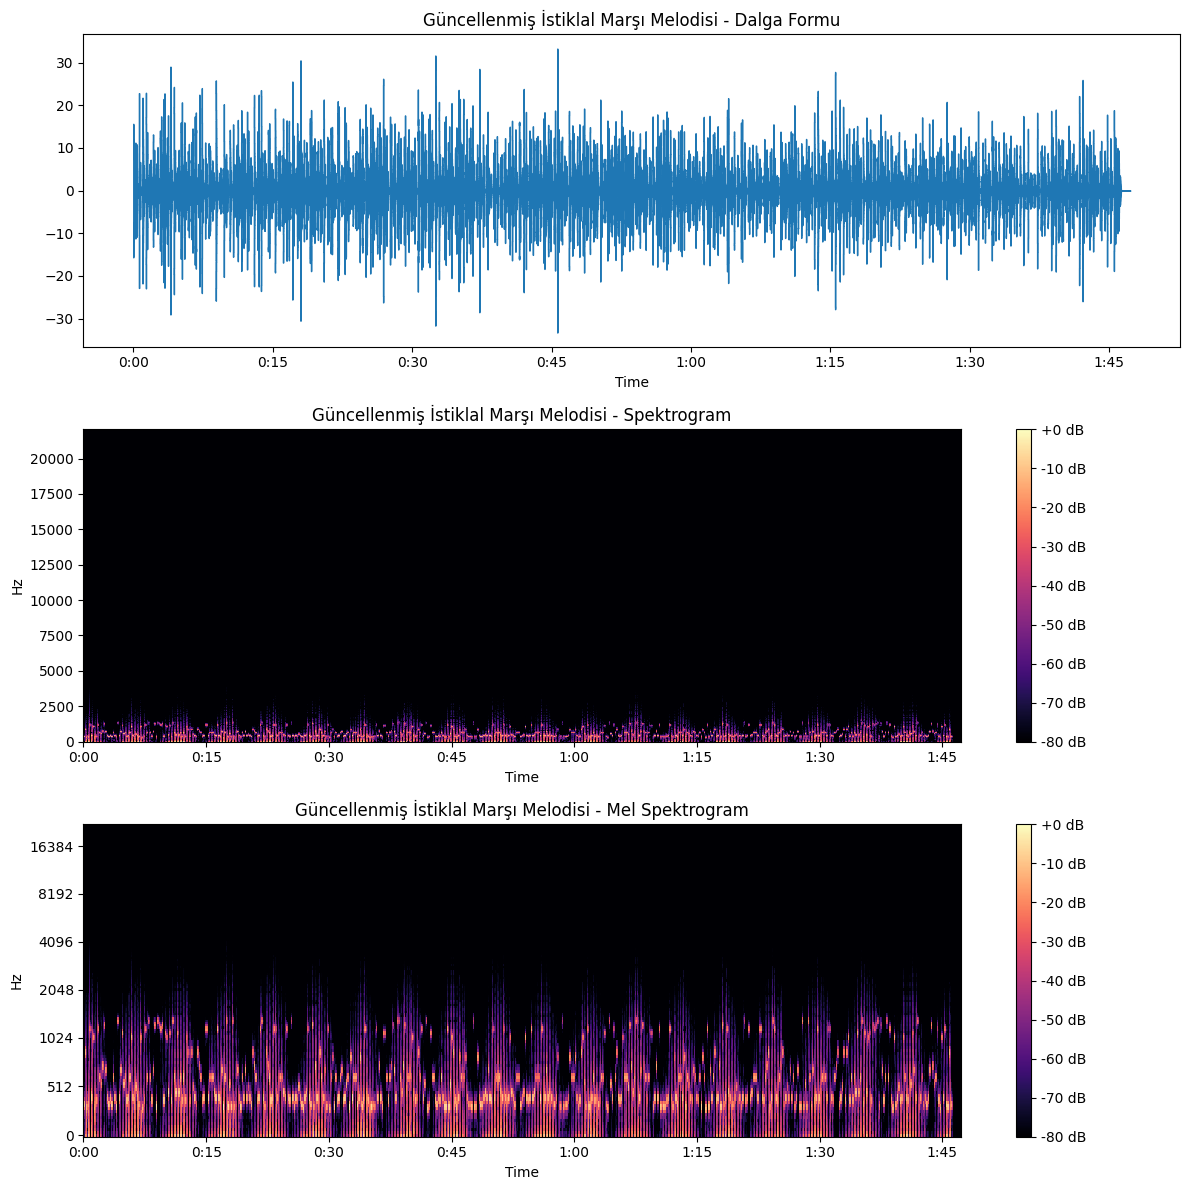

Güncellenmiş melodi görselleştirmesi 'istiklal_marsi_guncellenmis_gorsellestirme.png' adıyla kaydedildi.


In [8]:
plt.figure(figsize=(12, 12))

# Dalga formu
plt.subplot(3, 1, 1)
librosa.display.waveshow(y_reverb, sr=sr)
plt.title('Güncellenmiş İstiklal Marşı Melodisi - Dalga Formu')

# Spektrogram
D = librosa.stft(y_reverb)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
plt.subplot(3, 1, 2)
librosa.display.specshow(S_db, x_axis='time', y_axis='hz', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Güncellenmiş İstiklal Marşı Melodisi - Spektrogram')

# Mel Spektrogram
S = librosa.feature.melspectrogram(y=y_reverb, sr=sr)
S_dB = librosa.power_to_db(S, ref=np.max)
plt.subplot(3, 1, 3)
librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Güncellenmiş İstiklal Marşı Melodisi - Mel Spektrogram')

plt.tight_layout()
plt.savefig("istiklal_marsi_guncellenmis_gorsellestirme.png")
plt.show()
print("Güncellenmiş melodi görselleştirmesi 'istiklal_marsi_guncellenmis_gorsellestirme.png' adıyla kaydedildi.")

## 10. Conclusion and Evaluation

In this project, we created an original melody using the text of the National Anthem and processed this melody in various ways. The main steps of the project were as follows:

1. Using the first two easy stanzas of the National Anthem, we assigned a random MIDI note to each letter.
2. We created two different melodies by transcribing the text in normal and reverse order.
3. We recorded these melodies in MIDI format.
4. We converted the MIDI file into audio data.
5. We visualized the created melodies.
6. We processed the audio data with the Librosa library to update the rhythm, apply pitch shifting and add a reverb effect.
7. Finally, we visualized the updated audio data in different ways.

This project presents an interesting application at the intersection of music and data science, combining text processing, music theory, audio production, audio processing and data visualization techniques.
